In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
import os
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import datasets
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold  # 方差過濾
from sklearn.metrics import recall_score

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
df= pd.read_csv("./All_clean_IQR.csv").drop(["Name","Sex","Country"],axis=1)
df

,Label,Eye_R_S_W,Eye_R_B_W,Eye_L_S_W,Eye_L_B_W,Eye_R_H1_W,Eye_R_H2_W,Eye_R_H3_W,Eye_R_H4_W,Eye_R_H5_W,...,face_R_widthS_L,face_L_width_L,face_L_widthS_L,Eye_to_eyebrow_L_L,eye_to_eyebrow_R_L,Nosehead_L,Forehead_w_L,nose_area,eye_R_area,eye_L_area
0,boss,0.186630,0.223305,0.182876,0.220148,0.013553,0.032178,0.047026,0.050299,0.041695,...,0.006584,0.507552,0.010848,0.069913,0.072954,0.103485,0.935589,0.149271,0.009237,0.009100
1,boss,0.200132,0.244124,0.177286,0.207472,0.015152,0.038025,0.056442,0.060386,0.050553,...,0.025190,0.288393,0.025477,0.057711,0.065030,0.086149,0.773583,0.145255,0.009582,0.008497
2,boss,0.179414,0.210726,0.192387,0.231409,0.019380,0.045778,0.066694,0.070605,0.057643,...,0.011141,0.487260,0.023674,0.050447,0.052480,0.076988,0.767872,0.161162,0.010328,0.009207
3,boss,0.175631,0.208198,0.179902,0.219480,0.024991,0.057128,0.082740,0.087278,0.069438,...,0.010561,0.333769,0.017909,0.046187,0.049003,0.051694,0.531466,0.190866,0.008599,0.009002
4,boss,0.189342,0.230542,0.180274,0.213068,0.008799,0.020458,0.030060,0.032070,0.027142,...,0.033373,0.543740,0.019484,0.056702,0.065572,0.122033,1.172724,0.120627,0.007554,0.007722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67303,sport,0.189668,0.224763,0.198537,0.235773,0.010172,0.024601,0.037045,0.040967,0.035552,...,0.004745,0.535850,0.008899,0.075036,0.080794,0.114940,0.938777,0.163385,0.007830,0.008369
67304,sport,0.194105,0.231643,0.176857,0.212704,0.012763,0.030614,0.045281,0.048855,0.041182,...,0.008964,0.513869,0.006003,0.060058,0.057974,0.107795,0.991027,0.138025,0.009976,0.007585
67305,sport,0.191906,0.226189,0.189833,0.226757,0.013453,0.031954,0.047510,0.051955,0.044398,...,0.011541,0.600640,0.016062,0.051738,0.071471,0.115522,1.017467,0.151713,0.010904,0.010422
67306,sport,0.201010,0.241555,0.181272,0.215937,0.010469,0.024807,0.036944,0.040215,0.034453,...,0.020875,0.473571,0.014753,0.058190,0.062242,0.116505,1.069344,0.124224,0.008928,0.006886


In [3]:
X=df.iloc[:,1:]
y=df["Label"]
y=y.to_list()
a=['boss', 'doctor', 'entertainer', 'ordinary_people', 'politician', 'sport']
for i in range(len(y)):
    if y[i] in a:
        b=y[i]
        y[i]=a.index(b)
y = pd.DataFrame(y)
y1=y.to_numpy()
y=y1.ravel()

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,stratify=y)

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_val_scaler = pd.DataFrame(scaler.transform(X_val))
X_train_scaler=pd.DataFrame(X_train_scaler)
X_train_scaler

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,0.632267,0.563525,-0.151189,-0.355303,-0.265270,-0.298310,-0.319535,-0.357422,-0.409344,-1.540465,...,0.550461,0.882823,-0.181761,0.009171,0.380740,1.982813,2.005163,-2.583173,0.654370,0.347589
1,2.148348,2.257714,-0.965458,-1.189560,0.094006,0.360909,0.514748,0.663513,0.853291,1.834811,...,1.985674,-1.187859,1.820093,0.029787,-0.732642,0.353010,-0.104681,-0.216098,0.931662,0.503442
2,-0.099552,-0.038034,-0.566075,-0.338681,1.250608,0.908288,0.765709,0.685561,0.558956,0.603632,...,2.122672,-1.150986,1.884196,1.053776,0.278201,-1.897669,-1.831778,0.621985,-0.272399,-0.335348
3,-0.753728,-1.031759,0.741368,0.925425,0.374479,0.447031,0.500440,0.545601,0.583269,0.270886,...,0.136403,0.567256,0.940995,0.352658,1.862854,-0.469321,-0.077025,1.403693,0.245181,0.040047
4,1.670661,1.738394,1.233642,0.606497,0.663921,0.954814,1.022667,1.039725,1.092338,1.378915,...,1.858445,-1.199576,2.376648,0.183133,-1.579293,0.095139,-0.386388,-0.131463,1.129610,2.037075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,2.947556,2.830710,1.597134,0.913841,1.151331,1.380445,1.413201,1.435914,1.461052,1.792051,...,1.970140,-0.726077,1.776758,-1.251327,1.196819,-0.031858,-0.129123,0.346446,1.871684,2.623605
53842,-0.015802,-0.150576,0.349453,0.502474,-0.048575,-0.256498,-0.327813,-0.345879,-0.366601,0.034017,...,-0.677213,0.027470,-0.853068,-0.211478,0.607339,-0.148272,-0.591234,1.106584,-0.522238,-0.746991
53843,-1.066878,-1.043440,-1.475364,-0.867946,-0.605290,-0.813008,-0.963086,-1.079133,-1.218665,-0.399170,...,-0.509623,0.424852,0.299465,-1.393322,0.368480,-0.376353,-0.253977,0.191888,-1.200767,-1.098973
53844,-1.052683,-1.149435,1.246025,1.299981,0.898869,0.793045,0.691207,0.591978,0.476564,-0.272034,...,-0.719334,0.626108,-0.466865,-1.223350,-1.328934,-0.056932,0.160576,0.090764,0.458288,0.244530


(53846, 32)


<AxesSubplot:>

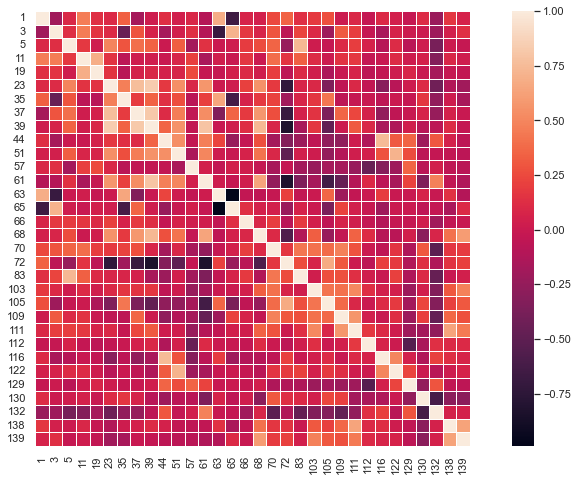

In [6]:
# corr
def find_correlation(df, thresh=0.9): # df: 量化變數資料矩陣


    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1) # 取下三角矩陣

    already_in = set() # 集合結構避免重複計入相同元素
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist() # Index物件轉為list
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr)) # 更新集合
            perfect_corr.append(col)
            result.append(perfect_corr)

    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat


drop_list = find_correlation(X_train_scaler, thresh=0.75)
X_train_corr = X_train_scaler.drop(drop_list, axis=1)
print(X_train_corr.shape)


X_corr2 =X_train_corr.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X_corr2, linewidths=0.5,square=True)

In [7]:
X_val_corr = X_val_scaler.drop(drop_list, axis=1)
X_val_corr

,1,3,5,11,19,23,35,37,39,44,...,109,111,112,116,122,129,130,132,138,139
0,0.968904,0.547650,0.625220,2.062015,1.949469,0.222402,0.085491,-0.266405,-0.756527,-1.696675,...,-0.806930,-1.636277,1.895107,-1.830131,-0.879473,-1.564053,0.463106,-0.205985,-1.747115,-0.943851
1,-0.184681,-0.074486,-1.085202,0.076367,-0.156783,0.012563,-1.034227,-0.898887,-0.149869,1.728620,...,-1.343955,-0.238414,0.058591,1.390001,1.011285,0.754141,-0.053807,0.534027,-0.961393,-0.881857
2,-0.017684,-0.220783,-0.393488,-0.816275,-0.725995,-0.113089,0.825557,-0.006371,0.636232,0.673328,...,0.495104,2.323295,0.196152,0.841042,0.704610,-0.115173,-1.829069,0.509338,1.530554,1.309027
3,-1.061226,0.785299,0.008905,-0.661990,-0.126622,0.429427,-0.457763,2.053261,0.313209,0.094473,...,1.814828,-0.683232,-0.810597,0.068727,-1.160636,1.956130,-0.072066,-0.118527,-0.511911,-0.631584
4,-0.053563,0.195589,0.106049,0.858623,0.918848,0.213188,-1.085248,-0.310974,0.139990,-0.553209,...,-0.716815,-0.763802,-2.194372,-1.023190,-0.710333,1.137026,1.036622,-0.112293,-1.204343,-0.902521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13457,1.184075,-1.673606,0.116434,-0.173139,0.785047,0.742411,0.527816,-1.175201,-0.188183,-0.708296,...,-1.951415,-0.945574,0.164763,-1.012383,-1.088039,-0.300336,1.318597,-1.452965,-0.654291,0.753512
13458,-0.602598,0.836153,-0.001058,-0.196258,-0.819545,-0.812776,-1.092528,0.148051,0.742024,1.057855,...,0.918367,1.764206,0.570617,1.101789,-0.370417,-0.423590,-1.329112,1.204101,1.644967,1.862809
13459,-1.503424,0.692480,0.256869,-0.465028,0.293843,0.019677,-1.319572,0.242191,0.238716,-0.695462,...,0.527466,0.305199,0.245238,-0.550966,-0.628822,-0.981634,0.372094,-0.476592,-0.179850,-0.061053
13460,-0.800303,0.096653,-1.198397,-0.997813,-1.502931,-1.858815,-0.661808,-0.678746,-1.364843,-1.159734,...,1.837559,0.286923,-0.502964,-0.708104,-0.904169,0.418116,-0.403130,0.927681,0.304379,0.702916


[0.79740858 0.14120453 0.04020043 0.01949285 0.00169361]


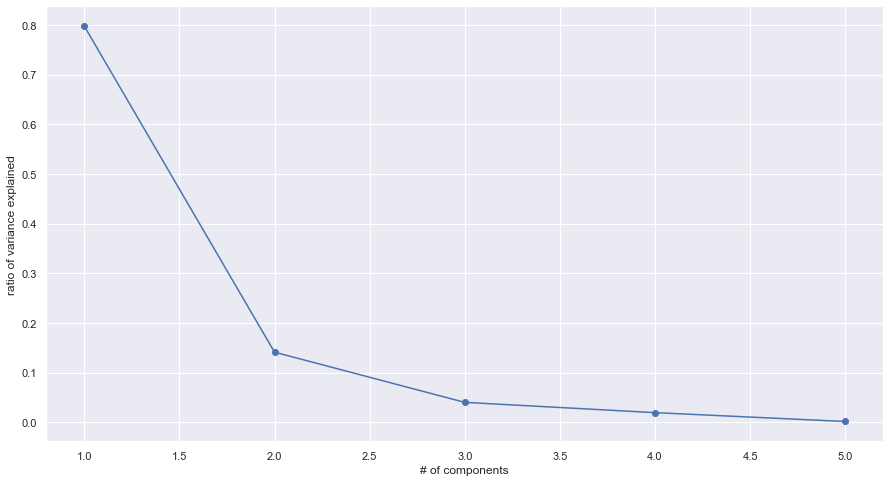

In [8]:
dr = LDA() # Principal Components Analysis 主成份分析，透過矩陣分解decomposition，預設會提取出min(n_samples, n_features)=58主成份，可改成PCA(n_components = 20)

# Step 3&4
# 分數矩陣cell_pca (cell_num 舊空間 -轉軸-> cell_pca 新空間)
X_train_lda = dr.fit_transform(X_train_corr,y_train) # PCA只能針對量化變數計算


# 負荷矩陣
# 前十個主成份與58個原始變數的(線性組合)關係
# dr.components_[:10] # [:10] can be removed.
# type(dr.components_) # numpy.ndarray
# dr.components_.shape # (58主成份, 58原始變量)的方陣

# 陡坡圖(scree plot)決定取幾個主成份
dr.explained_variance_ratio_
print(dr.explained_variance_ratio_)

plt.plot(range(1, 6), dr.explained_variance_ratio_[:5], '-o')
plt.xlabel('# of components')
plt.ylabel('ratio of variance explained')


# 取前7個
dr = LDA(n_components=5)
X_train_lda = dr.fit_transform(X_train_corr,y_train)
X_val_lda=dr.transform(X_val_corr)

In [9]:
model = neighbors.KNeighborsClassifier(n_neighbors=22, p=2)

In [10]:
scores = cross_val_score(model, X_train_lda, y_train, cv=5, scoring='recall_macro')
print(scores)

print("Accuracy: {} (+/- {})".format(scores.mean(), scores.std() * 2))

[0.69230358 0.69824906 0.69036064 0.69150476 0.69318049]
Accuracy: 0.6931197090705767 (+/- 0.005455312040331424)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lda, y_train, test_size=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
num_correct_samples = accuracy_score(y_test, y_pred, normalize=False)
con_matrix = confusion_matrix(y_test, y_pred)
recall_w = recall_score(y_test, y_pred,average="macro")
recall_N = recall_score(y_test, y_pred,average=None)


# print('number of correct sample: {}'.format(num_correct_samples))
print('accuracy: {}'.format(accuracy))
print('con_matrix: \n{}'.format(con_matrix))
print(f"recall:{recall_w}")
print(f"recall:{recall_N}")

accuracy: 0.9486536675951718
con_matrix: 
[[ 381   29   98  116   24   10]
 [  24   69   33    6   27    1]
 [  26   19  815    1   19    4]
 [   0    0    0 8769    0    0]
 [  20   34   33    0   80    1]
 [   6    2   15    4    1  103]]
recall:0.6991121791926292
recall:[0.57902736 0.43125    0.9219457  1.         0.47619048 0.78625954]


In [12]:
y_pred1 = model.predict(X_val_lda)
con_matrix = confusion_matrix(y_val, y_pred1)
recall_w = recall_score(y_val, y_pred1,average="macro")
print('con_matrix: {}'.format(con_matrix))
print(f"recall:{recall_w}")

con_matrix: [[  479    36   114   136    42     4]
 [   30    76    42     4    37     1]
 [   31    27   978     1    25     6]
 [    1     0     0 11021     0     0]
 [   31    42    43     1    99     0]
 [    9     6    25     5     1   109]]
recall:0.6779712670825885
